In [1]:
import pandas as pd

In [4]:
evi = pd.read_csv('data/satdata/evi.csv', parse_dates=[0], index_col=[0]).interpolate()
display(evi.head(2))
stemp = pd.read_csv('data/satdata/stemp.csv', parse_dates=[0], index_col=[0]).interpolate()
display(stemp.head(2))

,Valkenberg,ChassÃ©,Fellenoord,Schorsmolen,Station,City,Belcrum,Doornbos-Linie,Biesdonk,Geeren-zuid,...,Bavel,Nieuw Wolfslaar,Buitengebied Bavel,Ulvenhout,Buitengebied Ulvenhout,Prinsenbeek,Buitengebied Prinsenbeek,Teteringen,Vuchtpolder,Buitengebied Teteringen
2000-02-18,1022.358209,1135.790323,1045.666667,841.133333,1078.019608,927.623188,1179.282353,1677.072115,1901.598425,1897.204918,...,2466.405018,2501.218935,3549.679273,2490.599278,2875.608618,2031.485269,3486.811581,2538.183178,4060.907809,2776.289817
2000-02-19,1028.309701,1133.202621,1061.366667,845.626389,1076.549020,924.116848,1181.397059,1651.535156,1903.628445,1867.666496,...,2391.569668,2426.726701,3411.957864,2444.137410,2821.674933,2023.479419,3349.167771,2448.882126,4032.486307,2676.976338


,Valkenberg,ChassÃ©,Fellenoord,Schorsmolen,Station,City,Belcrum,Doornbos-Linie,Biesdonk,Geeren-zuid,...,Bavel,Nieuw Wolfslaar,Buitengebied Bavel,Ulvenhout,Buitengebied Ulvenhout,Prinsenbeek,Buitengebied Prinsenbeek,Teteringen,Vuchtpolder,Buitengebied Teteringen
2000-02-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-02-25,7.803134,7.67,7.67,7.67,7.975652,7.681014,8.183882,8.588983,10.374878,NaN,...,7.837814,8.833188,7.680287,8.424296,8.41691,9.553871,8.897485,9.25206,10.857093,8.88718


In [6]:
df = pd.concat([evi, stemp], axis=1, keys=["evi", "stemp"])
df.head(2)

evi                                                     \
             Valkenberg      ChassÃ©   Fellenoord Schorsmolen      Station   
2000-02-18  1022.358209  1135.790323  1045.666667  841.133333  1078.019608   
2000-02-19  1028.309701  1133.202621  1061.366667  845.626389  1076.549020   

                                                                              \
                  City      Belcrum Doornbos-Linie     Biesdonk  Geeren-zuid   
2000-02-18  927.623188  1179.282353    1677.072115  1901.598425  1897.204918   
2000-02-19  924.116848  1181.397059    1651.535156  1903.628445  1867.666496   

            ... stemp                                               \
            ... Bavel Nieuw Wolfslaar Buitengebied Bavel Ulvenhout   
2000-02-18  ...   NaN             NaN                NaN       NaN   
2000-02-19  ...   NaN             NaN                NaN       NaN   

                                                                        \
           Buitengebied Ulvenhout Prinsenbeek Buitengebied Prinsenbeek   
2000-02-18                    NaN         NaN                      NaN   
2000-02-19                    NaN         NaN                      NaN   

                                                           
           Teteringen Vuchtpolder Buitengebied Teteringen  
2000-02-18        NaN         NaN                     NaN  
2000-02-19        NaN         NaN                     NaN  

[2 rows x 112 columns]

evi                                                      \
       Valkenberg      ChassÃ©   Fellenoord  Schorsmolen      Station   
2000  1959.342351  1643.336694  1823.127778  1356.859722  1566.941176   
2001  1509.323694  1286.301411  1514.376389  1180.212500  1376.924020   

                                                                         ...  \
             City      Belcrum Doornbos-Linie     Biesdonk  Geeren-zuid  ...   
2000  1396.591486  1647.910294    2409.533654  2609.063976  2559.987705  ...   
2001  1220.304348  1527.687500    2120.725962  2157.952756  2383.137295  ...   

          stemp                                                \
          Bavel Nieuw Wolfslaar Buitengebied Bavel  Ulvenhout   
2000  18.194767       18.810000          17.230430  17.520036   
2001  13.126972       13.113077          12.571406  11.548209   

                                                                             \
     Buitengebied Ulvenhout Prinsenbeek Buitengebied Prinsenbeek Teteringen   
2000              16.917569   18.206391                16.627435  17.810600   
2001              11.142188   13.341864                12.216387  13.895274   

                                          
     Vuchtpolder Buitengebied Teteringen  
2000   16.720663               17.464233  
2001   13.279205               13.199672  

[2 rows x 112 columns]

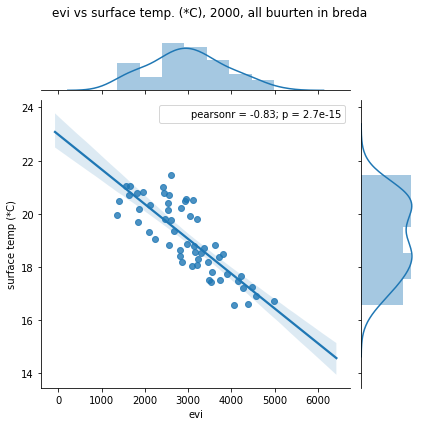

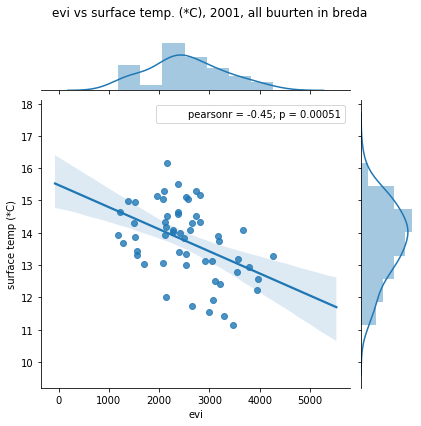

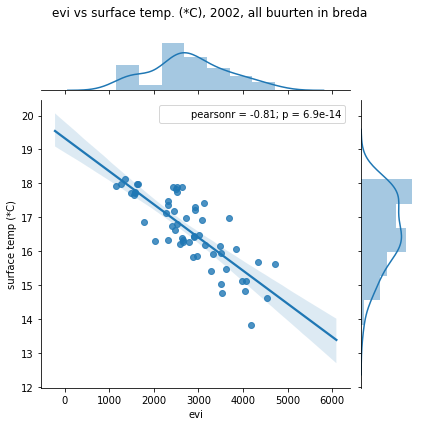

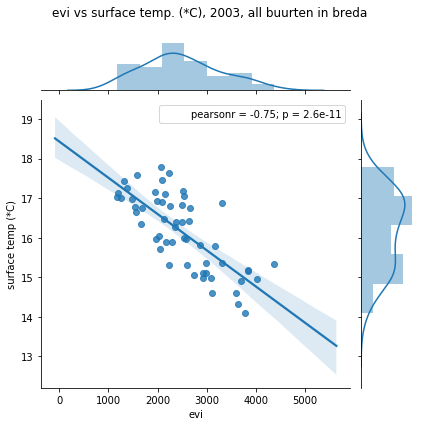

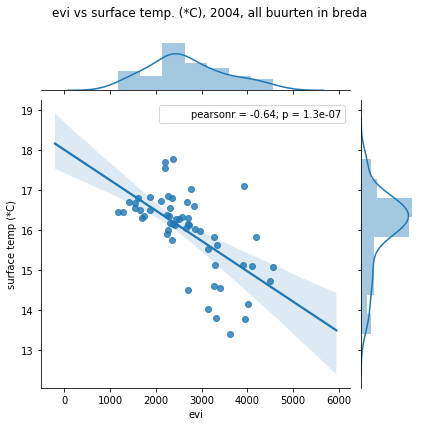

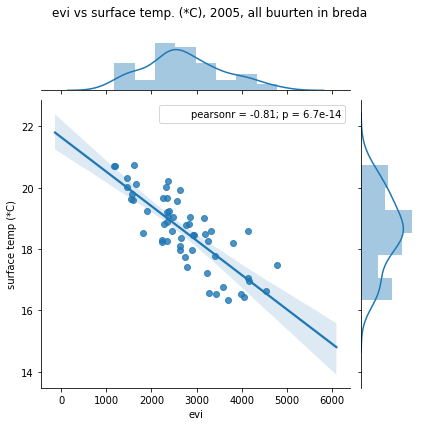

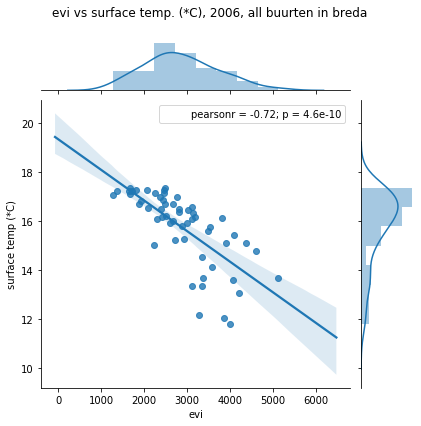

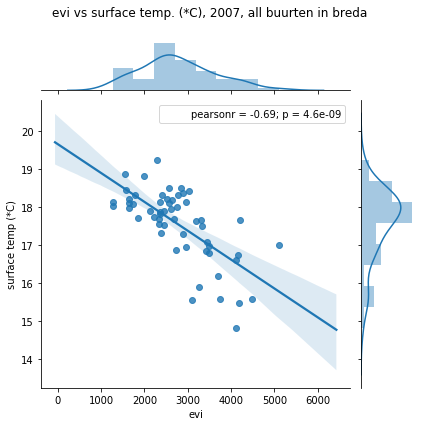

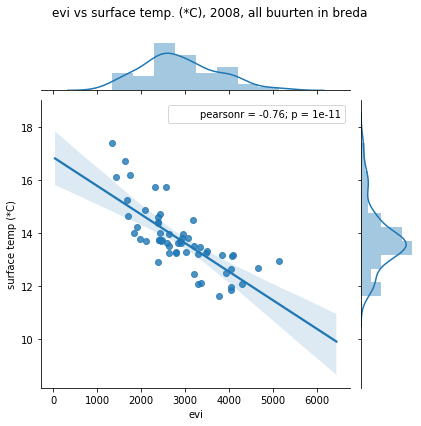

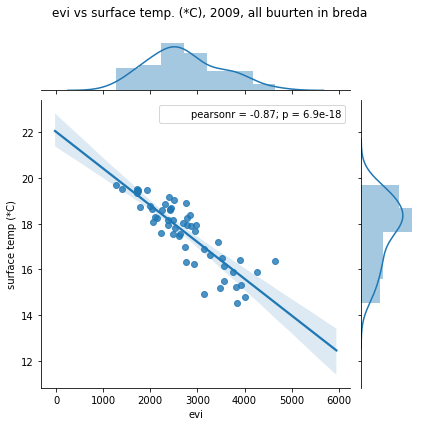

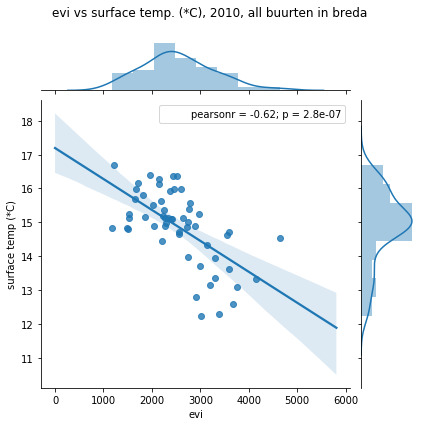

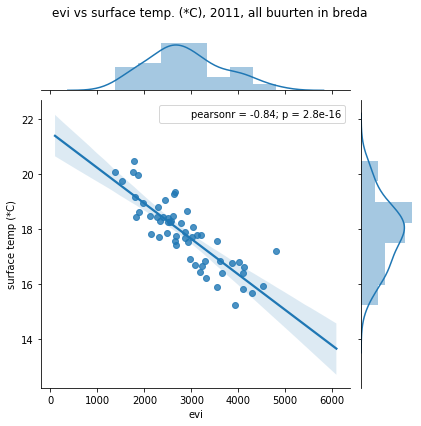

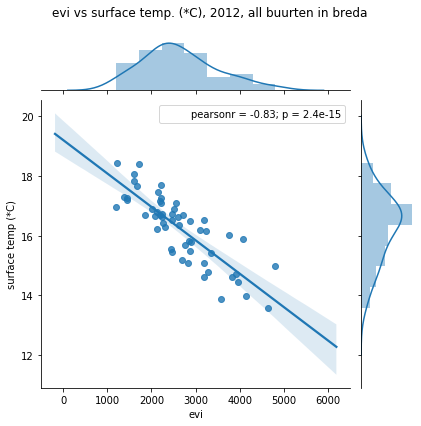

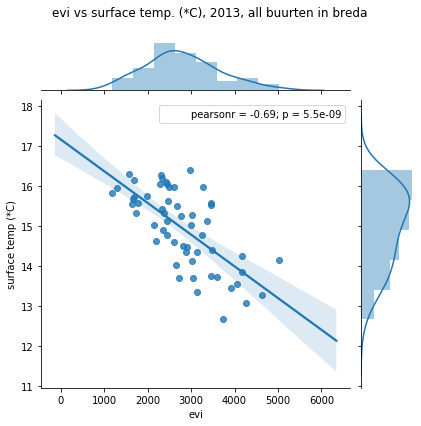

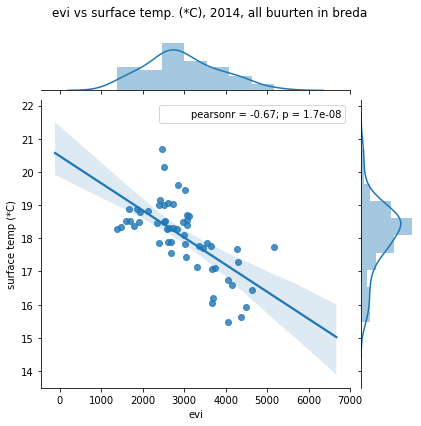

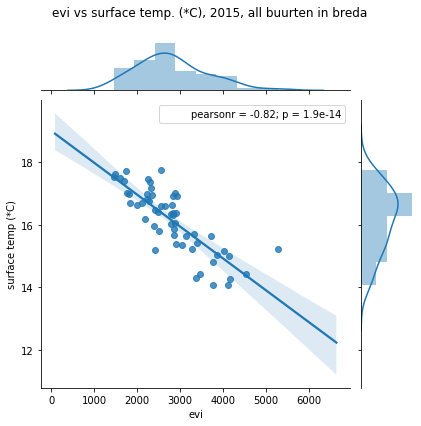

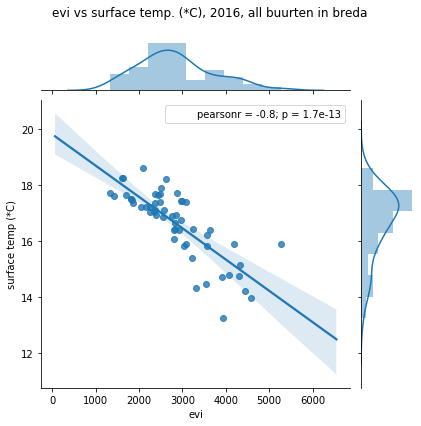

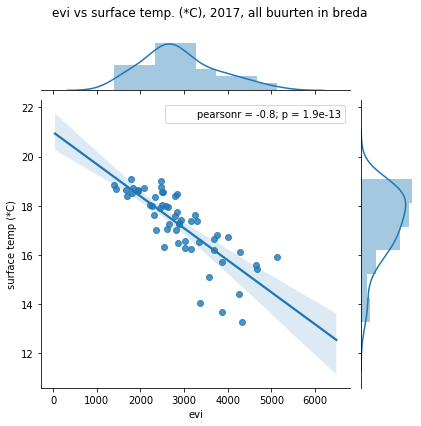

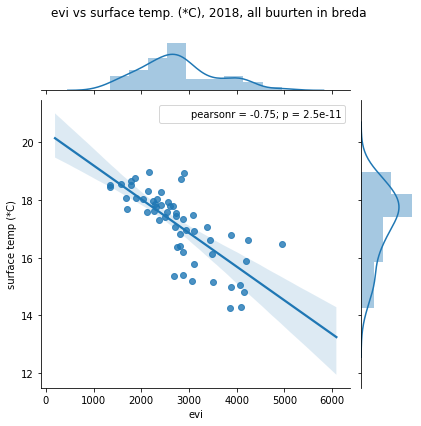

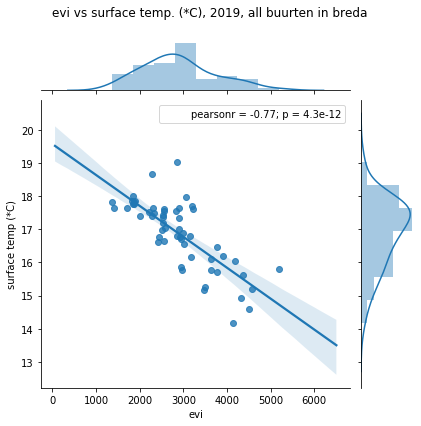

In [55]:
import seaborn as sns
import scipy.stats as stats

dfg = df.groupby(df.index.year).median()
display(dfg.head(2))
for i, year in enumerate(dfg.index):
    g = sns.jointplot(dfg.loc[year, 'evi'], dfg.loc[year, 'stemp'], kind='reg').annotate(stats.pearsonr)
    plt.xlabel('evi')
    plt.ylabel('surface temp (*C)')
    plt.subplots_adjust(top=0.9)
    g.fig.suptitle('evi vs surface temp. (*C), {}, all buurten in breda'.format(year))

In [34]:
dfg.unstack()

evi    Valkenberg               2000    1959.342351
                                2001    1509.323694
                                2002    1636.574627
                                2003    1584.831157
                                2004    1643.424440
                                           ...     
stemp  Buitengebied Teteringen  2015      15.182000
                                2016      15.896339
                                2017      16.727778
                                2018      16.799436
                                2019      16.473572
Length: 2240, dtype: float64